In [1]:
import nltk
import pandas as pd

In [2]:
#Taking random customer reviews or random sentences
text=['This is what we are learning from Topmentor**','In this article, I will be exlaining various data cleaning techniques',
     'Stay tuned for this FURTHER we will learn more &&','Nah i do not like the product which he was talking']
text
df=pd.DataFrame({'text':text}) ## creating a dataframe
df

,text
0,This is what we are learning from Topmentor**
1,"In this article, I will be exlaining various d..."
2,Stay tuned for this FURTHER we will learn more &&
3,Nah i do not like the product which he was tal...


In [3]:
df['lower']=df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [4]:
df

,text,lower
0,This is what we are learning from Topmentor**,this is what we are learning from topmentor**
1,"In this article, I will be exlaining various d...","in this article, i will be exlaining various d..."
2,Stay tuned for this FURTHER we will learn more &&,stay tuned for this further we will learn more &&
3,Nah i do not like the product which he was tal...,nah i do not like the product which he was tal...


In [5]:
## in the above line, we have done 3 things- first splitted the sentences in text, then lower the cases, then joined with a " "(space)

### Punctuation remover

In [6]:
# 1st method
import string

In [7]:
string.punctuation ## it shows all punctuations which can be removed

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
df['cleaned_data']=df.lower.apply(lambda x: "".join(i for i in x if i not in string.punctuation))

In [9]:
df

,text,lower,cleaned_data
0,This is what we are learning from Topmentor**,this is what we are learning from topmentor**,this is what we are learning from topmentor
1,"In this article, I will be exlaining various d...","in this article, i will be exlaining various d...",in this article i will be exlaining various da...
2,Stay tuned for this FURTHER we will learn more &&,stay tuned for this further we will learn more &&,stay tuned for this further we will learn more
3,Nah i do not like the product which he was tal...,nah i do not like the product which he was tal...,nah i do not like the product which he was tal...


In [10]:
#2nd method
import re

In [11]:
df.lower.apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]',x)))

0          this is what we are learning from topmentor
1    in this article i will be exlaining various da...
2      stay tuned for this further we will learn more 
3    nah i do not like the product which he was tal...
Name: lower, dtype: object

### STOPWORDS

In [12]:
import nltk
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91878\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords

In [14]:
all_stopwords=stopwords.words('english')
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
df['new_text']=df.cleaned_data.apply(lambda x:" ".join(i for i in x.split() if i not in all_stopwords))

In [16]:
print(df)

                                                text  \
0      This is what we are learning from Topmentor**   
1  In this article, I will be exlaining various d...   
2  Stay tuned for this FURTHER we will learn more &&   
3  Nah i do not like the product which he was tal...   

                                               lower  \
0      this is what we are learning from topmentor**   
1  in this article, i will be exlaining various d...   
2  stay tuned for this further we will learn more &&   
3  nah i do not like the product which he was tal...   

                                        cleaned_data  \
0        this is what we are learning from topmentor   
1  in this article i will be exlaining various da...   
2    stay tuned for this further we will learn more    
3  nah i do not like the product which he was tal...   

                                            new_text  
0                                 learning topmentor  
1  article exlaining various data cleaning tech

### STEMMING

In [17]:
from nltk.stem import PorterStemmer

In [18]:
st=PorterStemmer()

In [19]:
df.new_text.apply(lambda x:" ".join(st.stem(word) for word in x.split()))

0                             learn topmentor
1    articl exlain variou data clean techniqu
2                             stay tune learn
3                       nah like product talk
Name: new_text, dtype: object

### LEMMATIZATION

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91878\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
lm=WordNetLemmatizer()

In [23]:
df['processed_data']=df.new_text.apply(lambda x:" ".join(lm.lemmatize(word) for word in x.split()))

In [24]:
df

,text,lower,cleaned_data,new_text,processed_data
0,This is what we are learning from Topmentor**,this is what we are learning from topmentor**,this is what we are learning from topmentor,learning topmentor,learning topmentor
1,"In this article, I will be exlaining various d...","in this article, i will be exlaining various d...",in this article i will be exlaining various da...,article exlaining various data cleaning techni...,article exlaining various data cleaning technique
2,Stay tuned for this FURTHER we will learn more &&,stay tuned for this further we will learn more &&,stay tuned for this further we will learn more,stay tuned learn,stay tuned learn
3,Nah i do not like the product which he was tal...,nah i do not like the product which he was tal...,nah i do not like the product which he was tal...,nah like product talking,nah like product talking


### EDA Explorations

In [25]:
## to check all the words in sentence
all_words=[]
for i in df['processed_data']:
    all_words.extend(i.split())

In [26]:
all_words

['learning',
 'topmentor',
 'article',
 'exlaining',
 'various',
 'data',
 'cleaning',
 'technique',
 'stay',
 'tuned',
 'learn',
 'nah',
 'like',
 'product',
 'talking']

In [28]:
k=nltk.FreqDist(all_words) ## to check the frequency of words

In [31]:
k

FreqDist({'learning': 1, 'topmentor': 1, 'article': 1, 'exlaining': 1, 'various': 1, 'data': 1, 'cleaning': 1, 'technique': 1, 'stay': 1, 'tuned': 1, ...})

In [29]:
k.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
k.keys()

dict_keys(['learning', 'topmentor', 'article', 'exlaining', 'various', 'data', 'cleaning', 'technique', 'stay', 'tuned', 'learn', 'nah', 'like', 'product', 'talking'])

### WordCloud 

In [32]:
!pip install wordcloud
from wordcloud import WordCloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 939.4 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


In [39]:
import matplotlib.pyplot as plt

In [34]:
words=[]
for i in df['processed_data']:
    words.extend([word for word in i.split()])

In [36]:
words

['learning',
 'topmentor',
 'article',
 'exlaining',
 'various',
 'data',
 'cleaning',
 'technique',
 'stay',
 'tuned',
 'learn',
 'nah',
 'like',
 'product',
 'talking']

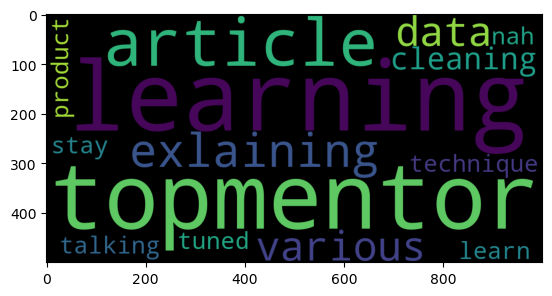

In [42]:
# For making a word cloud
wordcloud=WordCloud(width=1000, height=500).generate(" ".join(words))
plt.imshow(wordcloud)
plt.show()

### TextBlob

In [43]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     ---- -------------------------------- 81.9/636.8 kB 657.6 kB/s eta 0:00:01
     ----- ------------------------------- 92.2/636.8 kB 655.4 kB/s eta 0:00:01
     --------- -------------------------- 163.8/636.8 kB 756.6 kB/s eta 0:00:01
     -------------- ----------------------- 245.8/636.8 kB 1.0 MB/s eta 0:00:01
     --------------------- ---------------- 368.6/636.8 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 460.8/636.8 kB 1.4 MB/s eta 0:00:01
     ----------------------------------- -- 593.9/636.8 kB 1.6 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00


In [44]:
from textblob import TextBlob

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91878\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [47]:
wiki=TextBlob("Python is a high-level general purpose programming language")
wiki.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general', 'JJ'),
 ('purpose', 'NN'),
 ('programming', 'NN'),
 ('language', 'NN')]

In [48]:
wiki.sentiment

Sentiment(polarity=0.05000000000000002, subjectivity=0.5)